# **FINAL PROJECT _ Optimization Methods for Data Science** 
### A.A. 2024-2025

**Pinos Gabriel** - 1965035  
**Federico Lattanzio** - 1886519

pinos.1965035@studenti.uniroma1.it  
lattanzio.1886519@studenti.uniroma1.it

In [1]:
# Import requird packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from warnings import filterwarnings
import matplotlib.pyplot as plt
filterwarnings('ignore')

In [2]:
# Import custom MLP functions
from Functions_ij_Pinos_Lattanzio import train_model, cross_validate_model

## **Dataset overview**
--------

The project leverages a set of UTKFace-derived datasets, each composed of:

- ResNet-extracted features labeled as feat_i

- A ground-truth target column named `gt`, representing:

  -  `AGE_PREDICTION.csv`: float age values ∈ [0, 100]

  - `GENDER_CLASSIFICATION.csv`: binary labels (0 = Female, 1 = Male)

  - `ETHNICITY_CLASSIFICATION.csv`: 5 ethnicity classes (0–4)

We begin with the age prediction dataset.

In [3]:
age_df = pd.read_csv("../dataset/AGE_PREDICTION.csv")

### **Preview ad structure of the `AGE_PREDICTION.csv` dataset.**

In [4]:
# Preview first entries 
print("First 10 entries in AGE_PREDICTION dataset:")
display(age_df.head(10))

# Dataset shape
print(f"\n - Total samples: {len(age_df)}")
print(f" -  Feature of features (excluding target): {age_df.shape[1] - 1}")


First 10 entries in AGE_PREDICTION dataset:


,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_24,feat_25,feat_26,feat_27,feat_28,feat_29,feat_30,feat_31,feat_32,gt
0,2.686191,-0.989465,-0.920503,1.607427,-0.896248,1.118974,-0.969456,1.811707,2.560955,3.803463,...,-0.862891,-0.909545,-0.915361,-0.952061,-0.989461,1.911855,1.409705,2.303997,-0.981840,54
1,-0.887917,4.915272,-0.939446,-0.343677,-0.964685,-0.478649,4.342395,-0.332870,-0.768041,-0.815375,...,-0.939201,-0.965917,-0.969461,-0.934799,5.304822,0.934790,-0.410701,0.284690,4.919212,18
2,-0.923215,2.746968,-0.918085,0.047804,-0.908587,-0.451752,2.984481,0.535007,-0.591029,-0.324043,...,-0.809726,-0.929934,-0.891814,-0.881796,3.415373,1.044108,-0.442615,0.033648,2.628199,26
3,-0.268866,-0.408416,-0.935145,0.731800,-0.922438,0.221781,-0.046606,1.149634,0.592136,1.357959,...,-0.834968,-0.937475,-0.917737,-0.929519,-0.226282,1.608048,0.276169,1.246468,-0.363367,33
4,0.529231,-0.829957,-0.897425,0.921280,-0.865304,0.331018,-0.644940,1.296097,1.166863,2.036034,...,-0.775411,-0.881967,-0.864018,-0.908001,-0.784495,1.329586,0.547925,1.195395,-0.810089,35
5,-0.793087,1.832985,-0.964968,0.274521,-0.962229,-0.288595,2.333454,0.788157,-0.311396,0.353214,...,-0.923235,-0.969646,-0.970492,-0.961975,2.462071,1.539259,-0.132857,0.922628,2.249941,29
6,-0.627914,0.537031,-0.846287,0.484149,-0.802970,-0.255616,1.103370,0.905729,0.121083,0.820827,...,-0.712115,-0.826480,-0.794454,-0.831328,1.042797,0.713609,-0.003151,0.097357,0.469993,13
7,-0.825429,3.686025,-0.979020,0.053158,-0.983342,-0.448615,3.839871,0.161758,-0.641629,-0.414449,...,-0.970626,-0.987172,-0.992049,-0.977634,4.310089,1.683480,-0.217012,1.010501,4.100075,28
8,1.978345,-0.941560,-0.906123,1.604776,-0.881297,0.819134,-0.879738,1.500830,1.694242,3.005683,...,-0.845833,-0.906470,-0.917842,-0.910915,-0.926480,1.689097,1.170266,1.745933,-0.939529,43
9,6.975595,-0.999944,-0.979416,5.483491,-0.976307,3.397312,-0.999714,2.934085,6.361970,9.293163,...,-0.980985,-0.976980,-0.982636,-0.989800,-0.999934,5.141039,4.198592,6.156951,-0.999915,54



 - Total samples: 20475
 -  Feature of features (excluding target): 32


### **Age Distribution**

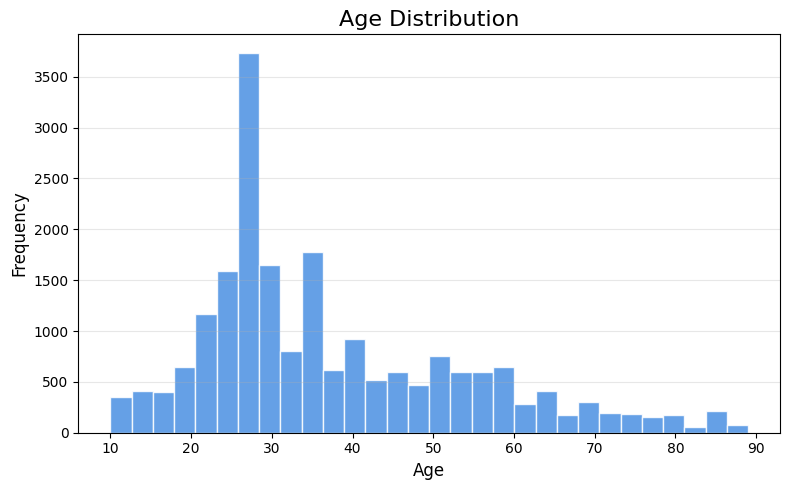

In [5]:
# Improved histogram plot
plt.figure(figsize=(8, 5))
plt.hist(age_df['gt'], bins=30, edgecolor='white', color='#4A90E2', alpha=0.85)
plt.title("Age Distribution", fontsize=16)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## **Part 1: Multi-Layer-Perceptron for age regression**
------
#### **Objective**
In this part, we implement a **Multi-Layer Perceptron (MLP)** from scratch (no high-level DL frameworks) to solve a regression task: predict the age of a person based on features extracted from facial images.

We aim to:

-   Train a deep **MLP** with at least **2 hidden layers**

-   Minimize **L2-regularized** squared loss

-   Use `scipy.optimize` as optimizer (e.g., **L-BFGS-B**)

-   Tune hyperparameters via **k-fold cross-validation**

-   Evaluate performance using:

    -   **MSE** (Mean Squared Error)

    -   **MAPE** (Mean Absolute Percentage Error)



### **Theoretical Background**

A Multi-Layer Perceptron is a feedforward neural network composed of layers of neurons. Each neuron performs a linear transformation followed by a non-linear activation. For this regression task, we define the loss function as:

$$
E(\omega, \beta) = \frac{1}{N} \sum_{i=1}^N (y_i - \hat{y}_i)^2 + \lambda \sum_{l=1}^{L} \|\omega^{(l)}\|_2^2
$$

Where:
- $y_i$ is the true age
- $\hat{y}_i$ is the predicted age
- $\omega^{(l)}$ is the weight matrix for layer $l$
- $\lambda$ is the regularization coefficient

The **regularization term** helps prevent overfitting by penalizing large weights.

### **Step 1: Data Preparation**  
   We first separate features from the target, then apply **standardization**.

In [6]:
# ➤ Separate features and target
X = age_df.drop(columns=['gt']).values     # Feature matrix
y = age_df['gt'].values                    # Target vector 

#### **Data Splitting and Normalization**

We follow a **two-stage data strategy**:

-   **Hold-out test set**: 20% of the dataset is reserved as an untouched test set for final evaluation.


-   **Training/validation set**: The remaining 80% will be used for **k-fold cross-validation** to tune the model's hyperparameters.


This separation ensures that the final test metrics are unbiased, as they reflect the model's generalization ability on unseen data after training and tuning.

**Important**:  
Feature standardization (`StandardScaler`) is applied only on the training set, using `fit_transform`.
The test set is transformed using the same scaler via transform.

This avoids **data leakage** — we must not use any information from the test set (like its **mean** or **standard deviation**) during training, as this would lead to overfitting and artificially low test error.

In [7]:
# ➤ Step 1: Split into training/validation and test set (80% / 20%)
X_tr, X_ts, Y_tr, Y_ts = train_test_split(X, y, test_size=0.2, random_state=123)

# ➤ Step 2: Standardize features using training set statistics only
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)   # Fit + transform on training set
X_ts = scaler.transform(X_ts)       # Only transform test set

# ➤ Dataset dimensions check
print(f"Training set samples: {X_tr.shape[0]}")
print(f"Test set samples    : {X_ts.shape[0]}")

Training set samples: 16380
Test set samples    : 4095


### **Hyperparameter Tuning via Cross-Validation**

To identify the best model architecture and regularization strength, we define a set of candidate configurations. Each configuration includes:

* The number of hidden layers and neurons per layer
* The non-linear activation function (`tanh` or `sigmoid`)
* The L2 regularization coefficient λ

These configurations will be evaluated via **5-fold cross-validation** using **Mean Absolute Percentage Error (MAPE)** as the metric.

In [8]:
# ➤ Define model configurations
input_dim = X_tr.shape[1]

configs = [
    {"layers": [input_dim, 32, 1],           "activation": "tanh",    "lambda": 1e-4},  # 1 hidden layer, light regularization
    {"layers": [input_dim, 64, 32, 1],       "activation": "tanh",    "lambda": 1e-3},  # 2 hidden layers
    {"layers": [input_dim, 64, 64, 32, 1],   "activation": "sigmoid", "lambda": 1e-4},  # 3 hidden layers, sigmoid
]

### **Performing 5-Fold Cross-Validation**

We now evaluate each configuration using **5-fold cross-validation** on the training set:

* Each fold is used once as validation, the remaining 4 for training.
* The model is trained from scratch at each fold.
* The average validation MAPE across the 5 folds is used to select the best model.

In [9]:
best_config, all_results, best_score = cross_validate_model(
    X_tr, Y_tr,
    k_folds=5,
    configs=configs,
    scoring='mape'
)

# Display selected configuration
print("\n - Best Config Selected:", best_config)

print("\n=== SELECTED CONFIGURATION ===")
print(f"Layers: {best_config['layers']}")
print(f"Activation: {best_config['activation']}")
print(f"Lambda: {best_config['lambda']}")
print(f"Number of hidden layers: {len(best_config['layers']) - 2}")



 - Best Config Selected: {'layers': [32, 32, 1], 'activation': 'tanh', 'lambda': 0.0001}

=== SELECTED CONFIGURATION ===
Layers: [32, 32, 1]
Activation: tanh
Lambda: 0.0001
Number of hidden layers: 1


In [10]:
# Print results for all configurations
print("\n=== ALL CONFIGURATIONS ===")
for config, val_error in all_results:
    print(f"{config} → Avg Val MAPE: {val_error:.2f}")


=== ALL CONFIGURATIONS ===
{'layers': [32, 32, 1], 'activation': 'tanh', 'lambda': 0.0001} → Avg Val MAPE: 23.18
{'layers': [32, 64, 32, 1], 'activation': 'tanh', 'lambda': 0.001} → Avg Val MAPE: 23.38
{'layers': [32, 64, 64, 32, 1], 'activation': 'sigmoid', 'lambda': 0.0001} → Avg Val MAPE: 42.37


### **Final Model Training on Full Training Set**

Once the best configuration is selected, we train the final model on the **entire training set**, using normalized targets.  
The training is performed using the **L-BFGS-B optimizer** from `scipy.optimize`.

In [16]:
# Normalize target for final training
y_min, y_max = Y_tr.min(), Y_tr.max()
Y_tr_norm = (Y_tr - y_min) / (y_max - y_min)

# Train the final model
final_model, opt_result, train_time = train_model(
    X_tr, Y_tr_norm,
    layer_sizes=best_config['layers'],
    activation=best_config['activation'],
    lambda_reg=best_config['lambda'],
    max_iter=1000
)

### **Model Predictions and Denormalization**

In [17]:
# Predict on training and test set
y_tr_pred = final_model.predict(X_tr) * (y_max - y_min) + y_min
y_ts_pred = final_model.predict(X_ts) * (y_max - y_min) + y_min

### **Model Evaluation**

We now evaluate the model on both the training and test set using **MSE** and **MAPE**.

In [ ]:
# Compute metrics
mse_train = mean_squared_error(Y_tr, y_tr_pred)
mape_train = mean_absolute_percentage_error(Y_tr, y_tr_pred) * 100

mse_test = mean_squared_error(Y_ts, y_ts_pred)
mape_test = mean_absolute_percentage_error(Y_ts, y_ts_pred) * 100

# Display performance
print("\n--- FINAL MODEL PERFORMANCE ---")
print(f"Training MSE - LOSS: {mse_train:.4f}")
print(f"Training MAPE : {mape_train:.2f}%")
print(f"Test MSE - LOSS     : {mse_test:.4f}")
print(f"Test MAPE     : {mape_test:.2f}%")


--- FINAL MODEL PERFORMANCE ---
Training MSE  - LOSS: 94.6926
Training MAPE : 23.09%
Test MSE - LOSS     : 95.7274
Test MAPE     : 23.68%


### **Optimization Summary**

In [ ]:
print("\n=== OPTIMIZATION DETAILS ===")
print("Optimizer success        :", opt_result.success)
print("Message                  :", opt_result.message)
print("Final loss (with regularization)  :", opt_result.fun)
print("Number of iterations     :", opt_result.nit)
print(f"Optimization time        : {train_time:.2f} seconds")


=== OPTIMIZATION DETAILS ===
Optimizer success        : True
Message                  : CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL
Final loss (reg. error)  : 0.015254282174966678
Number of iterations     : 579
Optimization time        : 3.34 seconds
